# Dengue Fever Heatmap of Variables

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_features = pd.read_csv('https://raw.githubusercontent.com/tarjin/DrivenData/master/dengue_features_train.csv')

In [3]:
df_labels = pd.read_csv('https://raw.githubusercontent.com/tarjin/DrivenData/master/dengue_labels_train.csv')

In [4]:
df_x = pd.DataFrame()

In [5]:
df_y = pd.DataFrame()

In [6]:
df_x = df_features

In [7]:
df_x = df_x.fillna(method='ffill')

In [8]:
df_y['total_cases'] = df_labels['total_cases']

In [9]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip

In [10]:
df_x = df_x.drop('week_start_date', axis=1)

In [11]:
df_x = pd.get_dummies(df_x)

In [12]:
# df_x = df_x.drop('city_iq', axis=1)

In [13]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_relative_humidity_percent     1456 non-null float64
reanalysis_sat_

In [14]:
df_xy = df_x

In [15]:
df_xy['total_cases'] = df_labels['total_cases']

In [16]:
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_relative_humidity_percent     1456 non-null float64
reanalysis_sat_

In [17]:
df_xy.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.131271,0.128068,0.202606,0.201987,45.686937,298.697965,299.221483,295.245445,...,16.745565,4.898656,27.180313,8.085646,32.443338,22.099863,39.194162,0.357143,0.642857,24.675137
std,5.408314,15.019437,0.138527,0.119561,0.074409,0.083592,43.779318,1.361950,1.262676,1.527527,...,1.542276,3.542340,1.280861,2.122836,1.960769,1.569113,47.363305,0.479322,0.479322,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,13.750000,0.039100,0.048250,0.152795,0.144455,9.655000,297.654643,298.257143,294.119643,...,15.560000,2.328571,26.300000,6.528571,31.100000,21.100000,8.700000,0.000000,0.000000,5.000000
50%,2002.000000,26.500000,0.113900,0.115926,0.195664,0.190121,38.235000,298.646429,299.285714,295.639286,...,17.087143,2.857143,27.400000,7.364286,32.800000,22.200000,23.800000,0.000000,1.000000,12.000000
75%,2005.000000,39.250000,0.232018,0.213429,0.247461,0.246775,70.227500,299.827500,300.207143,296.460000,...,17.977500,7.617857,28.132143,9.600000,33.900000,23.300000,53.675000,1.000000,1.000000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,1.000000,1.000000,461.000000


In [18]:
f, ax = plt.subplots(figsize=(10, 8))

In [19]:
corr = df_xy.corr()

In [20]:
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


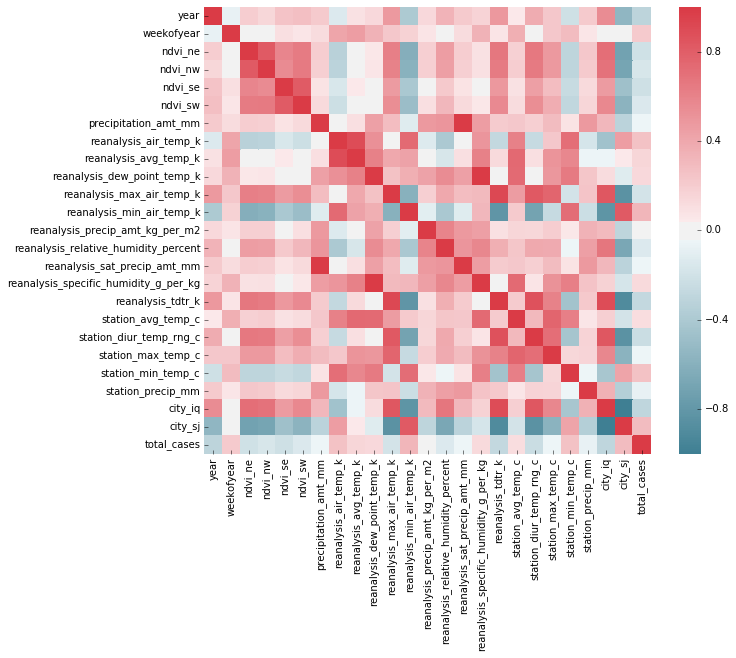

In [21]:
plt.show()